In [2]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Read the preprocessed data
X_train = pd.read_csv('../data/processed/X_train.csv')
X_val = pd.read_csv('../data/processed/X_val.csv')
X_test = pd.read_csv('../data/processed/X_test.csv')
y_train_resampled = pd.read_csv('../data/processed/y_train.csv').iloc[:, 0]  # Convert to Series
y_val_resampled = pd.read_csv('../data/processed/y_val.csv').iloc[:, 0]      # Convert to Series
y_test  = pd.read_csv('../data/processed/y_test.csv' )
# Define a range of hyperparameters to search over
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create a LogisticRegression model with regularization
model = LogisticRegression(max_iter=1000, penalty='l2')

# Use GridSearchCV to find the best hyperparameters using cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train_resampled)

# Get the best model with the selected hyperparameters
best_model = grid_search.best_estimator_

# Train the best model on the entire training data
best_model.fit(X_train, y_train_resampled)

# Evaluate the model on the validation set
validation_accuracy = best_model.score(X_val, y_val_resampled)
print("Validation Accuracy:", validation_accuracy)
# Evaluate the model on the test set
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Validation Accuracy: 0.9622098254453842
Test Accuracy: 0.9709082733812949


In [3]:
# Get the coefficients and feature names
coefficients = best_model.coef_[0]
feature_names = X_train.columns

# Create a DataFrame to show the coefficients for each feature
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by absolute value of coefficients
coef_df['Absolute Coefficient'] = coef_df['Coefficient'].abs()
sorted_coef_df = coef_df.sort_values(by='Absolute Coefficient', ascending=False)

print(sorted_coef_df)

                Feature  Coefficient  Absolute Coefficient
33                adrtg    -4.916668              4.916668
2                  Ortg    -4.121574              4.121574
14                twoPA    -3.767555              3.767555
8               AST_per    -3.684106              3.684106
1               Min_per    -3.550795              3.550795
13                twoPM     3.467574              3.467574
29      midmade_midmiss     3.299228              3.299228
32                 drtg     3.091546              3.091546
26              rimmade    -3.028647              3.028647
37                 obpm     2.833919              2.833919
46                  ast     2.615815              2.615815
28              midmade    -2.401952              2.401952
23                adjoe     2.242148              2.242148
31  dunksmiss_dunksmade     2.235947              2.235947
20              stl_per    -2.075527              2.075527
27      rimmade_rimmiss     2.058863              2.0588

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Load the preprocessed data
X_train = pd.read_csv('../data/processed/X_train.csv')
X_val = pd.read_csv('../data/processed/X_val.csv')
X_test = pd.read_csv('../data/processed/X_test.csv')
y_train_resampled = pd.read_csv('../data/processed/y_train.csv').iloc[:, 0]
y_val_resampled = pd.read_csv('../data/processed/y_val.csv').iloc[:, 0]
y_test = pd.read_csv('../data/processed/y_test.csv')
coefficients = pd.DataFrame({
    'Feature': ['adrtg', 'Ortg', 'twoPA', 'AST_per', 'Min_per', 'twoPM', 'midmade_midmiss', 'drtg', 'rimmade',
                'obpm', 'ast', 'midmade', 'adjoe', 'dunksmiss_dunksmade', 'stl_per', 'rimmade_rimmiss', 'TS_per',
                'dgbpm', 'GP', 'ogbpm', 'dunksmade', 'twoP_per', 'pfr', 'eFG', 'porpag', 'mp', 'TO_per', 'dbpm',
                'usg', 'bpm', 'FT_per', 'pts', 'stl', 'FTM', 'dreb', 'gbpm', 'TPM', 'oreb', 'stops', 'blk_per',
                'blk', 'DRB_per', 'FTA', 'TP_per', 'dporpag', 'ast_tov', 'treb', 'TPA', 'ORB_per', 'ftr'],
    'Absolute Coefficient': [4.916668, 4.121574, 3.767555, 3.684106, 3.550795, 3.467574, 3.299228, 3.091546,
                             3.028647, 2.833919, 2.615815, 2.401952, 2.242148, 2.235947, 2.075527, 2.058863,
                             2.009893, 1.595698, 1.582945, 1.503346, 1.473125, 1.463673, 1.360865, 1.358551,
                             1.347222, 1.312392, 1.282955, 1.237845, 1.116839, 1.108407, 0.811712, 0.550708,
                             0.540787, 0.538184, 0.513948, 0.511959, 0.493268, 0.422905, 0.403076, 0.374969,
                             0.334299, 0.330392, 0.269183, 0.259580, 0.254862, 0.248707, 0.159028, 0.125305,
                             0.054520, 0.008861]
})
# Set a threshold for absolute coefficient values
threshold = 1.2

# Select features with absolute coefficient values above the threshold
selected_features = coefficients[coefficients['Absolute Coefficient'] > threshold]['Feature'].tolist()

# Create DataFrames with selected features
X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]
X_test_selected = X_test[selected_features]

# Initialize XGBoost model
xgb_model_2 = XGBClassifier()

# Train the model on the training data
xgb_model_2.fit(X_train_selected, y_train_resampled)

# Predict on validation set
val_predictions = xgb_model_2.predict(X_val_selected)
val_accuracy = accuracy_score(y_val_resampled, val_predictions)
print("Validation Accuracy:", val_accuracy)

# Predict on test set
test_predictions = xgb_model_2.predict(X_test_selected)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy:", test_accuracy)


Validation Accuracy: 0.9761112110851179
Test Accuracy: 0.9669514388489209


In [6]:
from joblib import dump

dump(xgb_model_2,  '../models/xgb_model_2.joblib')

['../models/xgb_model_2.joblib']

Validation AUROC: 0.9986947725065299
Test AUROC: 0.9978915428808032


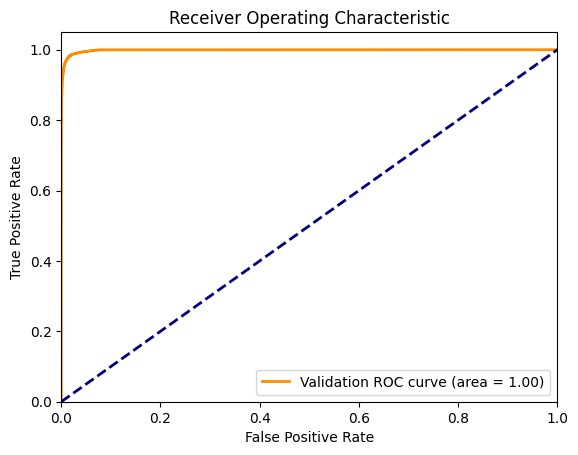

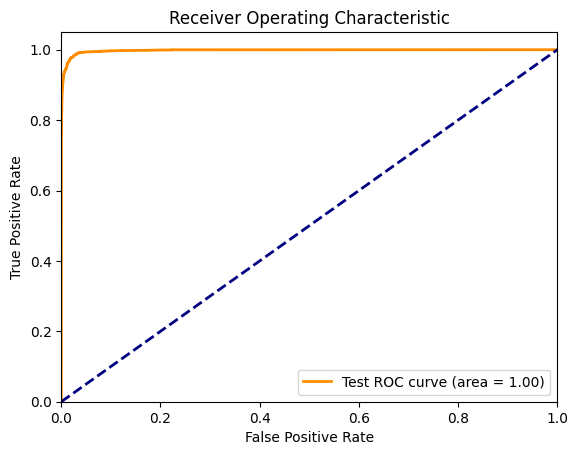

In [7]:
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict probabilities for the positive class
val_probabilities = xgb_model_2.predict_proba(X_val_selected)[:, 1]
test_probabilities = xgb_model_2.predict_proba(X_test_selected)[:, 1]

# Calculate AUROC for validation set
val_auroc = roc_auc_score(y_val_resampled, val_probabilities)
print("Validation AUROC:", val_auroc)

# Calculate AUROC for test set
test_auroc = roc_auc_score(y_test, test_probabilities)
print("Test AUROC:", test_auroc)

# Plot ROC curve for validation set
fpr_val, tpr_val, _ = roc_curve(y_val_resampled, val_probabilities)
plt.figure()
plt.plot(fpr_val, tpr_val, color='darkorange', lw=2, label='Validation ROC curve (area = %0.2f)' % val_auroc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve for test set
fpr_test, tpr_test, _ = roc_curve(y_test, test_probabilities)
plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='Test ROC curve (area = %0.2f)' % test_auroc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [8]:
import pandas as pd
import numpy as np

# Load the test data
test = pd.read_csv('../data/raw/test.csv')

# List of features to keep based on the provided dataframe description
selected_features = [
    'GP', 'Min_per', 'Ortg', 'usg', 'eFG', 'TS_per', 'ORB_per', 'DRB_per', 
    'AST_per', 'TO_per', 'FTM', 'FTA', 'FT_per', 'twoPM', 'twoPA', 'twoP_per', 'TPM', 'TPA', 
    'TP_per', 'blk_per', 'stl_per', 'ftr', 'porpag', 'adjoe', 'pfr', 'ast_tov', 
    'rimmade', 'rimmade_rimmiss', 'midmade', 'midmade_midmiss', 'dunksmade', 'dunksmiss_dunksmade', 
    'drtg', 'adrtg', 'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm', 'mp', 'ogbpm', 'dgbpm', 
    'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk', 'pts'
]

# Keep only the selected features in the test dataframe
test_selected = test[selected_features]

# Now you can use the 'test_selected' dataframe for further processing or testing


In [9]:
test_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4970 entries, 0 to 4969
Data columns (total 50 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GP                   4970 non-null   int64  
 1   Min_per              4970 non-null   float64
 2   Ortg                 4970 non-null   float64
 3   usg                  4970 non-null   float64
 4   eFG                  4970 non-null   float64
 5   TS_per               4970 non-null   float64
 6   ORB_per              4970 non-null   float64
 7   DRB_per              4970 non-null   float64
 8   AST_per              4970 non-null   float64
 9   TO_per               4970 non-null   float64
 10  FTM                  4970 non-null   int64  
 11  FTA                  4970 non-null   int64  
 12  FT_per               4970 non-null   float64
 13  twoPM                4970 non-null   int64  
 14  twoPA                4970 non-null   int64  
 15  twoP_per             4970 non-null   f

In [10]:
test_selected.to_csv('../data/processed/final_test_set.csv', index=False)


In [13]:
import pandas as pd
from joblib import load
from sklearn.preprocessing import StandardScaler

# Load the saved model
xgb_loaded_model = load('../models/xgb_model_2.joblib')
# Load the saved StandardScaler object
loaded_scaler = load('../models/scaler.joblib')

coefficients = pd.DataFrame({
    'Feature': ['adrtg', 'Ortg', 'twoPA', 'AST_per', 'Min_per', 'twoPM', 'midmade_midmiss', 'drtg', 'rimmade',
                'obpm', 'ast', 'midmade', 'adjoe', 'dunksmiss_dunksmade', 'stl_per', 'rimmade_rimmiss', 'TS_per',
                'dgbpm', 'GP', 'ogbpm', 'dunksmade', 'twoP_per', 'pfr', 'eFG', 'porpag', 'mp', 'TO_per', 'dbpm',
                'usg', 'bpm', 'FT_per', 'pts', 'stl', 'FTM', 'dreb', 'gbpm', 'TPM', 'oreb', 'stops', 'blk_per',
                'blk', 'DRB_per', 'FTA', 'TP_per', 'dporpag', 'ast_tov', 'treb', 'TPA', 'ORB_per', 'ftr'],
    'Absolute Coefficient': [4.916668, 4.121574, 3.767555, 3.684106, 3.550795, 3.467574, 3.299228, 3.091546,
                             3.028647, 2.833919, 2.615815, 2.401952, 2.242148, 2.235947, 2.075527, 2.058863,
                             2.009893, 1.595698, 1.582945, 1.503346, 1.473125, 1.463673, 1.360865, 1.358551,
                             1.347222, 1.312392, 1.282955, 1.237845, 1.116839, 1.108407, 0.811712, 0.550708,
                             0.540787, 0.538184, 0.513948, 0.511959, 0.493268, 0.422905, 0.403076, 0.374969,
                             0.334299, 0.330392, 0.269183, 0.259580, 0.254862, 0.248707, 0.159028, 0.125305,
                             0.054520, 0.008861]
})

# Set a threshold for absolute coefficient values
threshold = 1.2

# Select features with absolute coefficient values above the threshold
selected_features = coefficients[coefficients['Absolute Coefficient'] > threshold]['Feature'].tolist()
X_tt = pd.read_csv('../data/processed/final_test_set.csv')
X_tt2 = pd.read_csv('../data/processed/final_test_set.csv')
X_tt = loaded_scaler.transform(X_tt)
X_tt = pd.DataFrame(X_tt, columns=X_tt2.columns)

X_tt = X_tt[selected_features]





In [14]:
predicted_probabilities_xgb = xgb_loaded_model.predict_proba(X_tt)

testing = pd.read_csv('../data/raw/test.csv')


xgb_result_df = pd.DataFrame({
    'player_id': testing['player_id'] ,
    'drafted_probability': predicted_probabilities_xgb[:, 1]
})

# Save the predicted probabilities to a CSV file
xgb_result_df.to_csv('../data/interim/best_model_predicted_probabilities.csv', index=False)